# 无监督学习
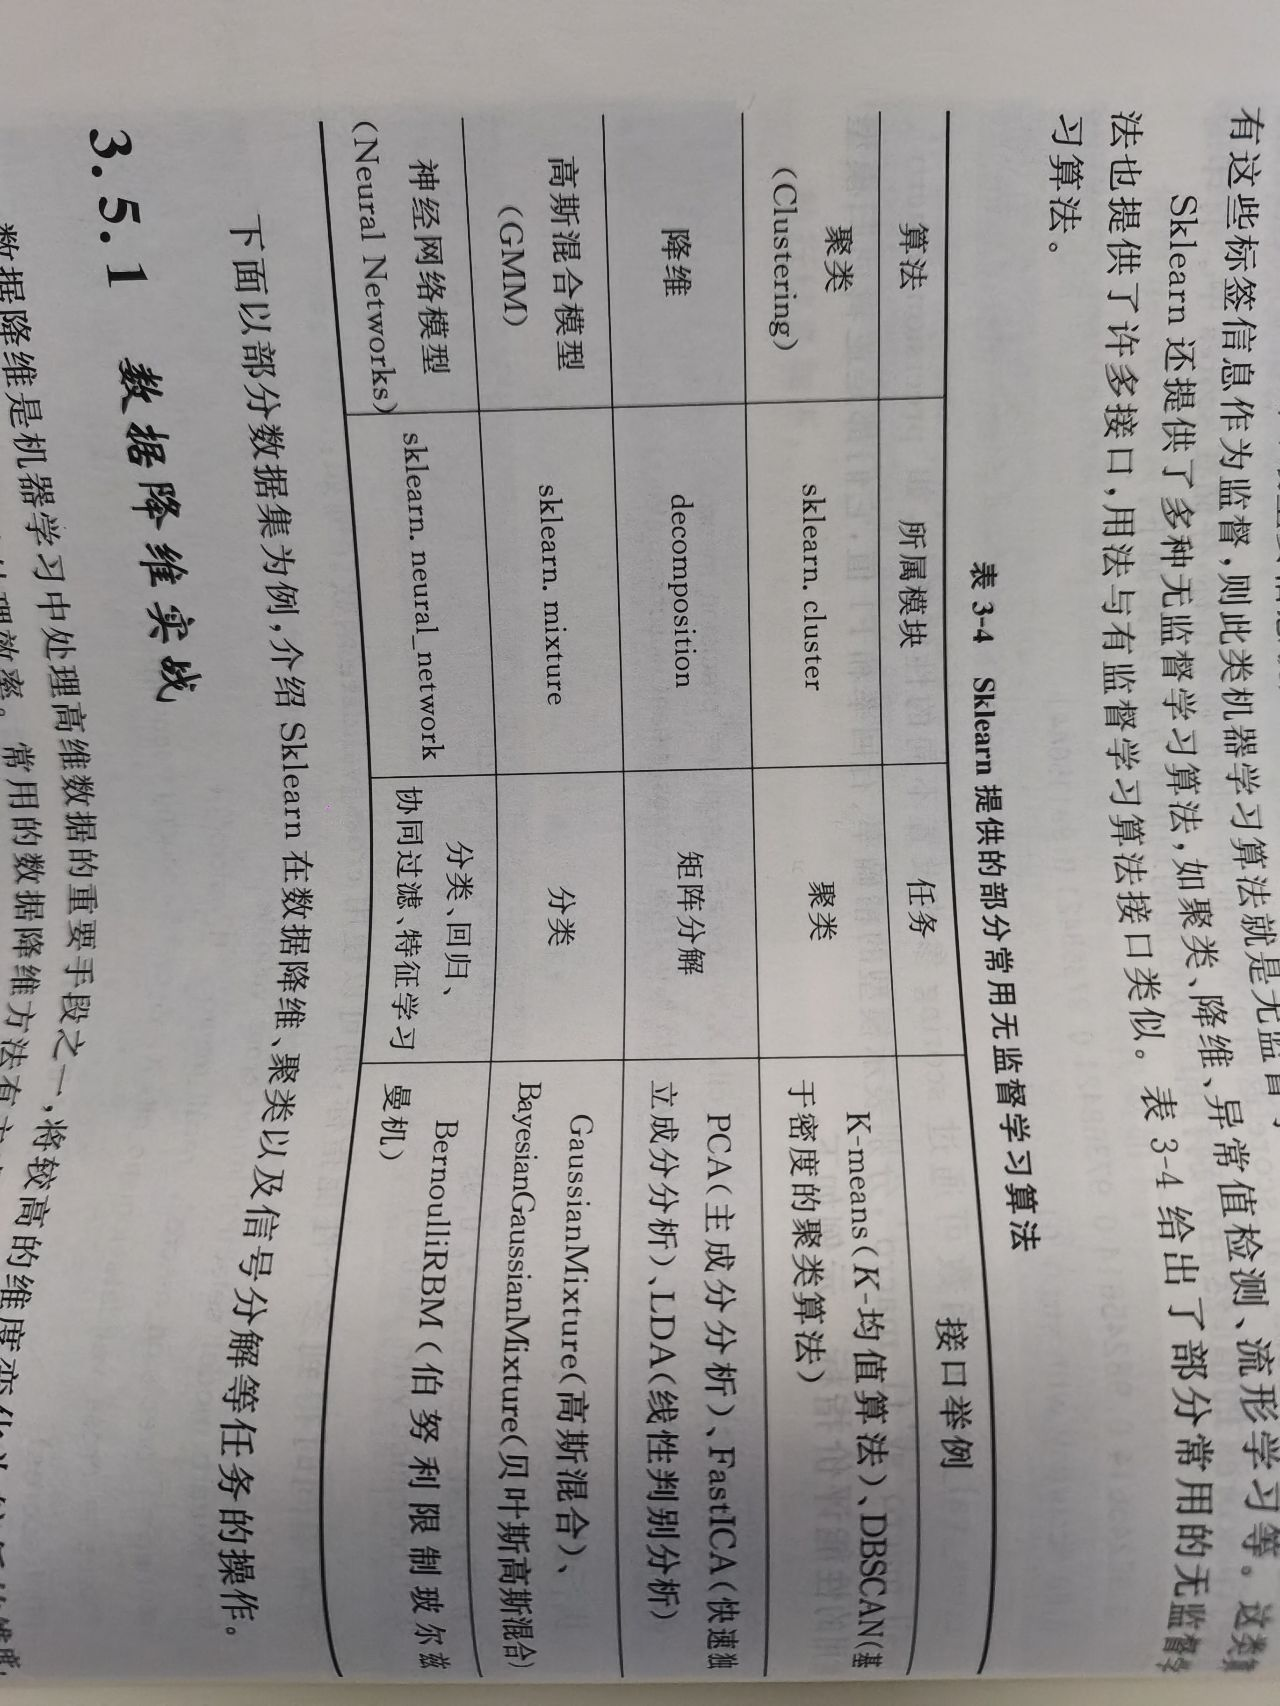

## 3.5.1 数据降维

常用的数据降维方法有主成分分析PCA和线性判别分析LDA等经典算法。

In [7]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load
iris = datasets.load_iris()

# X,y
X,y,target_names =iris.data, iris.target, iris.target_names

titles = ['PCA','LDA']

# instantiate 选择前两个主成分
pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

# 降维数据的list
X_rs = []

# Train, append to X_rs
X_rs.append(pca.fit(X).transform(X))
X_rs.append(lda.fit(X,y).transform(X))

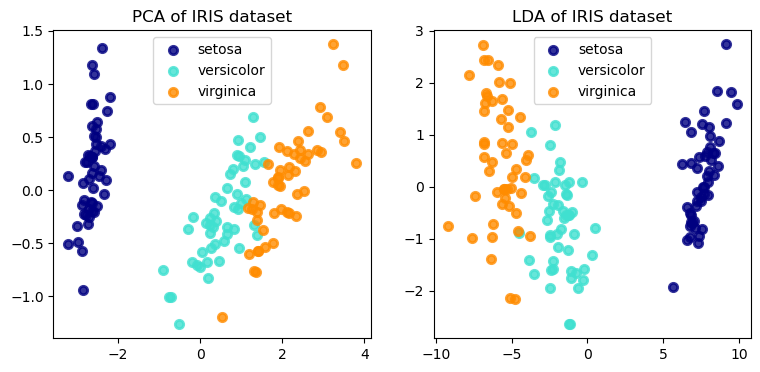

In [9]:
%matplotlib inline

from matplotlib import pyplot as plt

# 用subplots方法创建1*2的图表，大小是9*4inch
fig, ax = plt.subplots(1,2, figsize=(9,4))
# 设置类别颜色颜色
colors = ["navy", "turquoise", "darkorange"] 

# 使用zip遍历（）里面的序列，分别赋值给前面的三个变量。X_rs是降维的数据，[0,1]是图表位置
for title, X_r, k in zip(titles, X_rs, [0,1] ):

    # [0,1,2]是类别的标签
    for color, i, target_name in zip(colors,[0,1,2], target_names):
        # 在第k个子图上绘制散点图(X_r中y等于i的行，第0列的元素，作为散点图的横坐标；X_r中y等于i的行，第1列的元素，作为散点图的纵坐标；lw是线宽)
        ax[k].scatter(
            X_r[y==i,0],X_r[y==i,1],color=color, alpha=0.8, lw=2, label=target_name
        )
        # 使用loc参数来指定位置，shadow参数来指定是否有阴影，scatterpoints参数来指定每个类别显示几个点
        ax[k].legend(loc="best", shadow=False, scatterpoints=1)
        ax[k].set_title("%s of IRIS dataset"%title)

## 聚类分析
聚类的类别数，通过参数n_clusters设置
可以通过参数init设置聚类中心初始化方法

In [10]:
import numpy as np
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y=True) #　得到所有样本特征和标签
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
print(f"#digits: {n_digits}; #samples: {n_samples}; #features: {n_features}")

#digits: 10; #samples: 1797; #features: 64


Kmeans 聚类

In [11]:
from sklearn.cluster import KMeans

# 创建一个KMeans对象，指定聚类个数为10，初始化次数为4，随机种子为0
# KMeans类是用于执行K均值聚类算法的类，它可以根据输入的数据自动找出最佳的聚类中心
# n_clusters参数表示要形成的聚类个数，也就是要生成的聚类中心个数
# n_init参数表示用不同的随机种子来初始化聚类中心的次数，最终结果是n_init次运行中惯性最小的那个
# random_state参数表示用于生成随机种子的值，如果指定一个整数，那么随机过程就是确定性的
kmeans = KMeans(n_clusters=10, n_init=4, random_state=0)

# 调用fit方法来训练模型，输入数据为data
# fit方法会根据输入的数据来学习模型的参数，即聚类中心的位置和惯性值
# data是一个二维数组，每一行表示一个样本，每一列表示一个特征
kmeans.fit(data)

# 获取模型的属性labels_，它是一个一维数组，表示每个样本所属的聚类标签
# 聚类标签是从0到n_clusters-1的整数，表示样本与哪个聚类中心最近
# 取出前100个样本的聚类标签，并赋值给y变量
y=kmeans.labels_[:100]

print(y)

# 获取模型的属性cluster_centers_，它是一个二维数组，表示每个聚类中心的坐标
# cluster_centers_数组的形状为(n_clusters, n_features)，即每一行表示一个聚类中心，每一列表示一个特征
# 调用shape属性来获取cluster_centers_数组的形状，并打印出来
print(kmeans.cluster_centers_.shape)

[6 2 2 1 0 7 5 3 1 7 6 9 8 1 0 4 5 3 2 7 6 9 8 1 0 4 5 3 2 7 6 7 4 4 5 4 6
 7 2 7 2 0 9 3 3 1 4 9 6 6 2 2 3 2 3 6 9 2 5 1 1 3 1 1 0 5 5 5 0 2 9 4 6 7
 4 9 2 9 6 6 9 3 5 1 8 9 3 0 5 1 9 1 7 2 3 2 2 0 1 2]
(10, 64)


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # instantiate,选择前两个主成分
X_r = pca.fit_transform(data[:100]) # 对前100个样本进行降维用于可视化

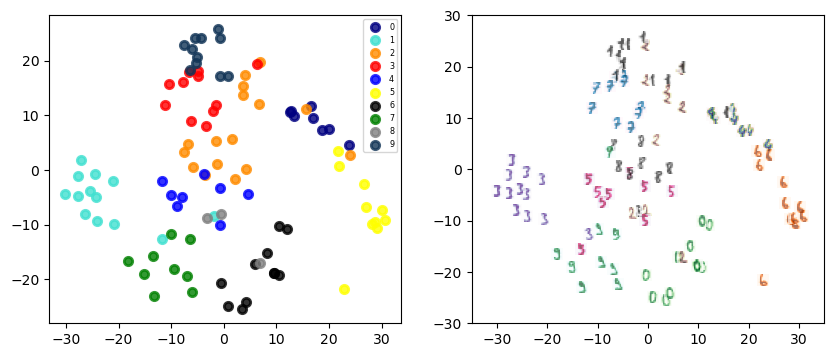

In [13]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,4))

colors=['navy', 'turquoise', 'darkorange', 'red', 'blue',
 'yellow', 'black', 'green', 'grey', '#123456']  
cmapcolors=['Greens', 'Greys', 'pink_r', 'Purples', 'gist_earth_r',
 'PuRd', 'Oranges', 'PuBu', 'gray_r', 'BuGn']  

# left
for color, i in zip(colors, range(10)):
    ax[0].scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, alpha=0.8, lw=2, label=str(i))
    ax[0].legend(loc="best", shadow=False, scatterpoints=1,fontsize='xx-small')

# right
# 设置第1个子图的横坐标范围为-35到35
ax[1].set_xlim(-35,35)
# 设置第1个子图的纵坐标范围为-30到30
ax[1].set_ylim(-30,30)
# 使用range函数来遍历从0到99的整数，赋值给i变量
for i in  range(100):
    # 创建一个OffsetImage对象，用于在注释中显示图片
    # 输入数据为data[i]，它是一个一维数组，表示第i个样本的特征值
    # 使用reshape方法将一维数组转换为8*8的二维数组，表示图片的像素值
    # 使用zoom参数来指定图片放大倍数
    # 使用cmap参数来指定图片颜色映射方式，根据labels[i]变量选择cmapcolors列表中对应的颜色映射名称
    imagebox=OffsetImage(data[i].reshape(8,8),zoom=1,cmap=cmapcolors[labels[i]], alpha=0.65)
    # 创建一个AnnotationBbox对象，用于在图形中添加图片注释
    # 输入图片对象为imagebox
    # 输入图片位置为X_r[i]，它是一个二维数组，表示第i个样本的降维后的坐标
    # 使用frameon参数来指定是否显示边框
    ab = AnnotationBbox(imagebox, xy=X_r[i], frameon=False)
    # 在第1个子图上添加图片注释对象
    ax[1].add_artist(ab)

In [14]:
# 通过参数init来设置三种不同的聚类中心初始化方法，对KMeans算法进行性能测试。

from time import time 
from sklearn import metrics  # 该模块用于指标计算
from sklearn.pipeline import make_pipeline # 该模块用于多个操作连成管道统一处理
from sklearn.preprocessing import StandardScaler # 该模块用于数据归一化

print(69 * "_")  #打印分割线
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI")  # 打印表头
print(69 * "_")

pca = PCA(n_components=10).fit(data)# 将样本降维到10

# 以下分别定义5种聚类初始方法的参数
init_name = ['k-means++(1)', 'k-means++(4)', 'random(1)', 'random(4)', 'PCA']
init_param = ['k-means++', 'k-means++', 'random', 'random', pca.components_]
n_init_v =[1,4,1,4,1]

for n_init, name ,init in zip(n_init_v, init_name, init_param):
    # 应用不同参数进行实例化
    kmeans = KMeans(init=init, n_clusters=n_digits, n_init=n_init, random_state=2)
    # 计算此时模型各项指标并输出
    t0 = time()
# 使用管道执行聚类算法
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time()-t0 # training time
    results = [name, fit_time, estimator[-1].inertia_]# 第3项为类内总距离平方和

    # 定义需要计算的性能指标，以下指标值越大代表性能越好
    clustering_metrics = [
        metrics.homogeneity_score,  # 同质性度量
        metrics.completeness_score,  # 完整性度量
        metrics.v_measure_score,  # 调和平均值
        metrics.adjusted_rand_score,  # ARI指数
        metrics.adjusted_mutual_info_score,  # AMI指数
    ]
# 利用原始标签和预测得到的标签得到每个性能指标值
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
    # 展示评估指标结果
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results)) 
print(69 * "_")  

_____________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI
_____________________________________________________________________
k-means++(1)	0.067s	69417	0.604	0.653	0.627	0.467	0.624
k-means++(4)	0.150s	69417	0.604	0.653	0.627	0.467	0.624
random(1)	0.030s	71303	0.546	0.616	0.579	0.415	0.574
random(4)	0.110s	70741	0.659	0.688	0.673	0.545	0.670
PCA      	0.033s	72686	0.636	0.658	0.647	0.521	0.643
_____________________________________________________________________


## 盲源信号分离实战

盲源信号分离是指从观测到多个的混合信号中分析出各个原始信号
源信号分离问题常用独立成分分析（Independent Component Analysis，ICA）来恢复各个信号源


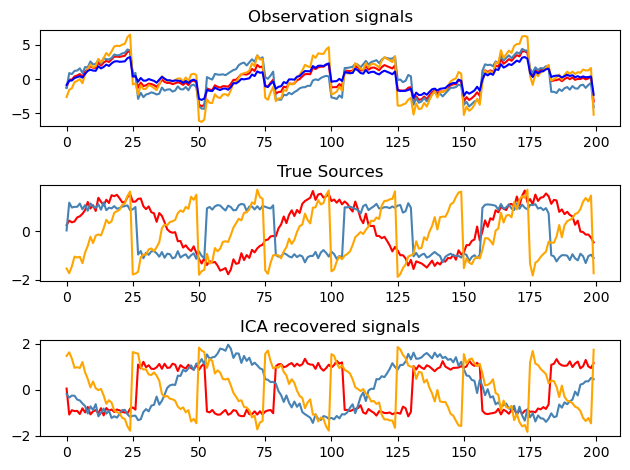

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # 使用了scipy库，安装anaconda会默认安装
from sklearn.decomposition import FastICA

# 数据生成
np.random.seed(0)
n_samples = 200
time = np.linspace(0, 8, n_samples)  # 生成采样数据
s1 = np.sin(2 * time)  # 信号1: 正弦信号
s2 = np.sign(np.sin(3 * time))  # 信号2: 方波信号
s3 = signal.sawtooth(2 * np.pi * time)  # 信号3: 锯齿波信号
S = np.c_[s1, s2, s3]  # 将对象沿第二个轴（按列）连接,shape为(200,3)
S += 0.1 * np.random.normal(size=S.shape)  # 增加噪声
S /= S.std(axis=0)  # 数据归一化
A = np.array([[1,1,1], [0.5,2,1.0], [1.5,1.0,2.0], [1,0.5,0.75]])  # 混淆矩阵
Y = np.dot(S, A.T)  # 生成观测信号,shape为(200,4), 每列代表一个观测信号

# 计算ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(Y)  # 重构原始信号,shape为(200,3)
A_ = ica.mixing_  # 获得估计混淆矩阵,shape为(4,3)

# 开始绘图
plt.figure() 
models = [Y, S, S_, ]
names = ["Observation signals", "True Sources", "ICA recovered signals"]
colors = ["red", "steelblue", "orange", "blue"]
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)  # 准备画每个子图
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)  # 在当前子图中画每个信号
plt.tight_layout()  # 自动调整子图大小